In [10]:
print("Data types of features before model training:\n", X.dtypes)


Data types of features before model training:
 animal name    object
hair_0          uint8
hair_1          uint8
feathers_0      uint8
feathers_1      uint8
eggs_0          uint8
eggs_1          uint8
milk_0          uint8
milk_1          uint8
airborne_0      uint8
airborne_1      uint8
aquatic_0       uint8
aquatic_1       uint8
predator_0      uint8
predator_1      uint8
toothed_0       uint8
toothed_1       uint8
backbone_0      uint8
backbone_1      uint8
breathes_0      uint8
breathes_1      uint8
venomous_0      uint8
venomous_1      uint8
fins_0          uint8
fins_1          uint8
legs_0          uint8
legs_2          uint8
legs_4          uint8
legs_5          uint8
legs_6          uint8
legs_8          uint8
tail_0          uint8
tail_1          uint8
domestic_0      uint8
domestic_1      uint8
catsize_0       uint8
catsize_1       uint8
dtype: object


In [11]:
df = df.drop(columns=['animal name'])


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset 
df = pd.read_csv(r'C:\Users\Dell\Downloads\Zoo.csv')  

# Check the first few rows to ensure the dataset is loaded correctly
print(df.head())

# Handle missing values by imputing with the mean (for numerical columns)
df.fillna(df.mean(), inplace=True)

# Optional: Print the dataset after handling missing values to verify
print(df.isnull().sum())  # Should show 0 if all missing values are handled

# Define the list of categorical columns (assuming they are string-based)
categorical_columns = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 
                       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 
                       'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']

# One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=categorical_columns)

# Label Encoding for the target column ('type') to convert categorical labels to numerical values
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])  # Convert target column to numeric

# Drop the 'animal name' column, as it is non-numeric and doesn't contribute to the prediction
df = df.drop(columns=['animal name'])

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['type'])  # Features: All columns except 'type'
y = df['type']  # Target: The 'type' column (now numeric)

# Check data types before training the model to ensure all features are numeric
print("Data types of features before model training:\n", X.dtypes)

# Convert any remaining non-numeric columns (if any) to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Check data types again to confirm conversion
print("Data types of features after conversion to numeric:\n", X.dtypes)

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the target for the test set
y_pred = knn.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))


  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  
animal n

C:\Users\Dell\AppData\Local\Temp\ipykernel_1872\1096416688.py:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Pre

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


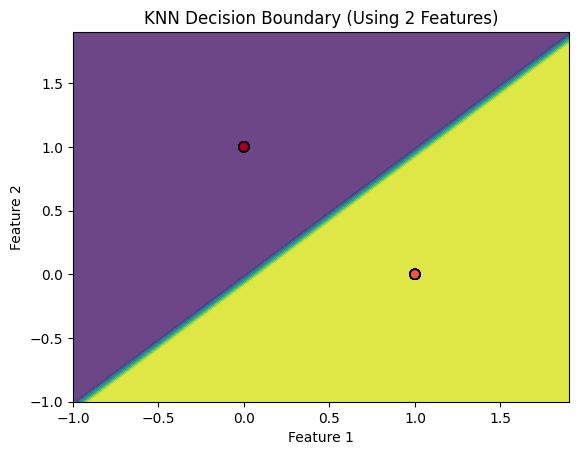

In [14]:
#Visualize the result
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Select two features for visualization (e.g., first two features from X)
X_selected = X.iloc[:, :2]  # Using the first two features for simplicity

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X_selected.iloc[:, 0].min() - 1, X_selected.iloc[:, 0].max() + 1
y_min, y_max = X_selected.iloc[:, 1].min() - 1, X_selected.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on the grid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_selected.iloc[:, 0], X_selected.iloc[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.RdYlBu)
plt.title("KNN Decision Boundary (Using 2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [5]:
# Check the column names in the dataset
print(df.columns)


Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')
